In [1]:
import csv
import folium
from folium.plugins import MarkerCluster
import numpy as np
import pandas as pd
#import ast
import json
from shapely.geometry import Point
from shapely.geometry.polygon import Polygon

coord_data = []
points = []
data = pd.read_csv('coord_1.csv')

data = data.dropna()
coord_data = list(data['coords'])
for i in range(len(coord_data)):
    tmp = coord_data[i].split(',')
    points.append([float(tmp[0][1:]), float(tmp[1][0:-1])])
data = data.reset_index(drop=True)
data['coords'] = pd.Series(points)
data['id'] = pd.Series(range(len(points)))
print(data)

        id                 coords  weight  height
0        0   [56.21883, 43.86902]  3560.0    53.0
1        1  [56.22218, 43.860675]  3700.0    54.0
2        2  [56.27995, 43.931103]  2920.0    49.0
3        3  [56.22298, 43.976225]  3060.0    49.0
4        4  [56.33455, 43.956579]  3220.0    50.0
...    ...                    ...     ...     ...
5915  5915  [56.23386, 43.968518]  3050.0    52.0
5916  5916  [56.14405, 44.187114]  3880.0    56.0
5917  5917  [56.33735, 44.118797]  3050.0    54.0
5918  5918  [57.46223, 45.588108]  2880.0    50.0
5919  5919  [56.38024, 44.019192]  4390.0    59.0

[5920 rows x 4 columns]


In [2]:
for point in data.iterrows():
    print(point)

(0, id                           0
coords    [56.21883, 43.86902]
weight                  3560.0
height                    53.0
Name: 0, dtype: object)
(1, id                            1
coords    [56.22218, 43.860675]
weight                   3700.0
height                     54.0
Name: 1, dtype: object)
(2, id                            2
coords    [56.27995, 43.931103]
weight                   2920.0
height                     49.0
Name: 2, dtype: object)
(3, id                            3
coords    [56.22298, 43.976225]
weight                   3060.0
height                     49.0
Name: 3, dtype: object)
(4, id                            4
coords    [56.33455, 43.956579]
weight                   3220.0
height                     50.0
Name: 4, dtype: object)
(5, id                            5
coords    [56.27522, 43.923153]
weight                   3340.0
height                     50.0
Name: 5, dtype: object)
(6, id                            6
coords    [56.34198, 43.944982]


In [ ]:
city_coord = [56.15, 43.6]
m = folium.Map(location = city_coord)
fg = folium.FeatureGroup(name="Icon collection", show=False).add_to(m)
folium.LayerControl().add_to(m)
marker_cluster = MarkerCluster().add_to(fg)

for index, point in data.iterrows():
    folium.Marker(location = point.coords).add_to(marker_cluster)

m

In [71]:
polygons = {}

with open('nizhniy_1.json') as f:
    templates = json.load(f)
for i in templates['features']:
    #print(i['properties'])
    print(i['geometry'])
    polygons[i['properties']['id']] = Polygon(i['geometry']['coordinates'][0])
print(polygons)

{'coordinates': [[[43.748395135130835, 56.21697509731939], [43.748395135130835, 56.192498267129906], [43.856358002951424, 56.192498267129906], [43.856358002951424, 56.21697509731939], [43.748395135130835, 56.21697509731939]]], 'type': 'Polygon'}
{'coordinates': [[[43.97119294831302, 56.322089998994585], [43.97119294831302, 56.300410128769556], [44.00699835510855, 56.300410128769556], [44.00699835510855, 56.322089998994585], [43.97119294831302, 56.322089998994585]]], 'type': 'Polygon'}
{0: <POLYGON ((43.748 56.217, 43.748 56.192, 43.856 56.192, 43.856 56.217, 43.74...>, 1: <POLYGON ((43.971 56.322, 43.971 56.3, 44.007 56.3, 44.007 56.322, 43.971 56...>}


63 0
75 1


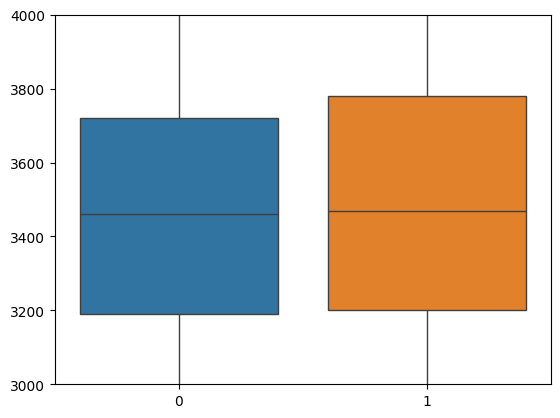

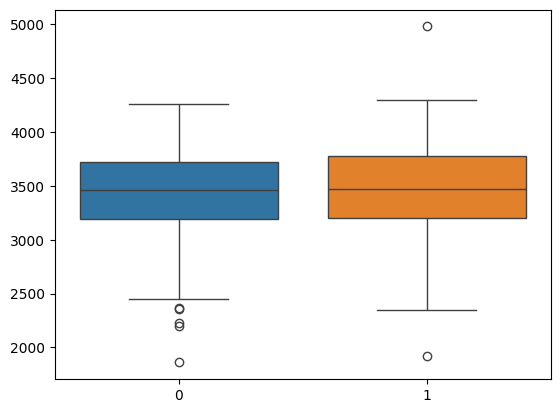

F_onewayResult(statistic=0.7444447965792002, pvalue=0.3897597131126308) [63, 75]


In [72]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import f_oneway

t_height = {}
t_weight = {}
count = 0
for i in polygons:
    for index, point in data.iterrows():
        if polygons[i].contains(Point(point['coords'][1], point['coords'][0])):
            #print(point)
            if t_weight.get(i) == None:
                t_weight[i] = []
                t_height[i] = []
            t_weight[i].append(point['weight'])
            t_height[i].append(point['height'])
for i in t_weight:
    print(len(t_weight[i]), i)
    #sns.kdeplot(t_weight[i])
    
    #plt.xlim([3000, 4000])
ax = sns.boxplot(data=t_weight)
ax.set_ylim([3000, 4000])
plt.show()

ax = sns.boxplot(data=t_weight)
#ax.set_ylim([3000, 4000])
plt.show()
avona = f_oneway(*t_weight.values())
print(avona, [len(tmp) for tmp in t_weight.values()])
for i in t_weight:
    t_weight[i] = np.mean(t_weight[i])
    t_height[i] = np.mean(t_height[i])



In [73]:
city_coord = [56.15, 43.6]
m = folium.Map(location = city_coord)
geo = templates

#state_data = data
folium.Choropleth(
    geo_data=geo,
    name="choropleth",
    data=t_weight,
    #columns=[state_data.index, 'weight'],
    key_on='feature.properties.id',
    fill_color="YlGn",
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name="Height",
).add_to(m)

m

In [40]:
poly = Polygon([
            [
              43.978655778779284,
              56.33207213057281
            ],
            [
              43.978655778779284,
              56.30853224753366
            ],
            [
              44.073705008220315,
              56.30853224753366
            ],
            [
              44.073705008220315,
              56.33207213057281
            ],
            [
              43.978655778779284,
              56.33207213057281
            ]
          ])
print(poly)
p = Point([
          44.0224,
          56.3189
        ])
if poly.contains(p):
    print('YES')

POLYGON ((43.978655778779284 56.33207213057281, 43.978655778779284 56.30853224753366, 44.073705008220315 56.30853224753366, 44.073705008220315 56.33207213057281, 43.978655778779284 56.33207213057281))
YES


In [41]:
dx = 0.02
dy = 0.03
# with open('nizhniy.json') as f:
#     templates = json.load(f)
# print(templates)


templates = []
num = 0

polygons = []
for i in range(15):
    for j in range(20):
        # folium.Rectangle(
        # bounds=[[56.15+dx*i, 43.6+dy*j], [56.15+dx*(i+1), 43.6+dy*(j+1)]],
        # ).add_to(m)
        
        new_pol = {
          "properties": {"id":num,},
          "geometry": {
            "coordinates": [
              [
                [city_coord[0]+dx*(i+1), city_coord[1]+dy*j],
                [city_coord[0]+dx*i, city_coord[0]+dy*j],
                [city_coord[0]+dx*i, city_coord[0]+dy*(j+1)],
                [city_coord[0]+dx*(i+1), city_coord[0]+dy*(j+1)]
              ]
            ],
            "type": "Polygon"
          }
        }
        
        polygons.append([num, Polygon([
                [city_coord[0]+dx*(i+1), city_coord[1]+dy*j],
                [city_coord[0]+dx*i, city_coord[0]+dy*j],
                [city_coord[0]+dx*i, city_coord[0]+dy*(j+1)],
                [city_coord[0]+dx*(i+1), city_coord[0]+dy*(j+1)]
              ])])
        templates.append(new_pol)
        num = num + 1 
geometries = {
    'type': 'FeatureCollection',
    'features': templates,
}
geo_str = json.dumps(geometries)
with open('nizhniy.json', 'w') as outfile:
    json.dump(geo_str, outfile)
print(geo_str)
#m

{"type": "FeatureCollection", "features": [{"properties": {"id": 0}, "geometry": {"coordinates": [[[56.17, 43.6], [56.15, 56.15], [56.15, 56.18], [56.17, 56.18]]], "type": "Polygon"}}, {"properties": {"id": 1}, "geometry": {"coordinates": [[[56.17, 43.63], [56.15, 56.18], [56.15, 56.21], [56.17, 56.21]]], "type": "Polygon"}}, {"properties": {"id": 2}, "geometry": {"coordinates": [[[56.17, 43.660000000000004], [56.15, 56.21], [56.15, 56.24], [56.17, 56.24]]], "type": "Polygon"}}, {"properties": {"id": 3}, "geometry": {"coordinates": [[[56.17, 43.690000000000005], [56.15, 56.24], [56.15, 56.269999999999996], [56.17, 56.269999999999996]]], "type": "Polygon"}}, {"properties": {"id": 4}, "geometry": {"coordinates": [[[56.17, 43.72], [56.15, 56.269999999999996], [56.15, 56.3], [56.17, 56.3]]], "type": "Polygon"}}, {"properties": {"id": 5}, "geometry": {"coordinates": [[[56.17, 43.75], [56.15, 56.3], [56.15, 56.33], [56.17, 56.33]]], "type": "Polygon"}}, {"properties": {"id": 6}, "geometry": 

In [42]:
t_height = {}
t_weight = {}
for i in polygons:
    for j in range(len(points)):
        if i[1].contains(Point(points[j])):
            if t_weight.get(i[0]) == None:
                t_weight[i[0]] = []
                t_height[i[0]] = []
            t_w = data['weight'][data['id'] == j]
            t_h = data['height'][data['id'] == j]
            t_weight[i[0]].append(float(t_w.iloc[0]))
            t_height[i[0]].append(float(t_h.iloc[0]))

for i in t_weight:
    t_weight[i] = np.mean(t_weight[i])
    t_height[i] = np.mean(t_height[i])
print(t_height)

{0: 50.5, 1: 50.5, 2: 50.5, 3: 50.5, 4: 49.0, 5: 49.0, 6: 49.0, 7: 49.0, 8: 49.0, 20: 51.0, 21: 51.0, 22: 51.0, 23: 51.0, 24: 51.0, 25: 51.0, 26: 51.0, 27: 51.0, 28: 51.0, 29: 51.0, 30: 51.0, 31: 51.0, 32: 51.0, 40: 51.666666666666664, 41: 51.666666666666664, 42: 51.666666666666664, 43: 51.666666666666664, 44: 51.666666666666664, 45: 51.666666666666664, 46: 51.666666666666664, 47: 51.666666666666664, 48: 51.666666666666664, 49: 51.666666666666664, 50: 51.666666666666664, 60: 52.90909090909091, 61: 53.0, 62: 52.857142857142854, 63: 52.666666666666664, 64: 52.666666666666664, 65: 52.666666666666664, 66: 53.8, 67: 53.5, 68: 53.0, 80: 50.142857142857146, 81: 50.142857142857146, 82: 50.63157894736842, 83: 50.63157894736842, 84: 51.333333333333336, 85: 51.333333333333336, 86: 50.0, 87: 50.0, 100: 52.7, 101: 52.888888888888886, 102: 52.888888888888886, 103: 52.875, 104: 52.875, 105: 52.142857142857146, 106: 52.2, 107: 51.666666666666664, 108: 51.666666666666664, 109: 52.0, 120: 51.60714285714

In [43]:
state_data = pd.DataFrame()
state_data['weight']= pd.DataFrame.from_dict(t_weight, orient='index')
state_data['height'] = pd.DataFrame.from_dict(t_height, orient='index')

print(state_data)

     weight  height
0    3295.0    50.5
1    3295.0    50.5
2    3295.0    50.5
3    3295.0    50.5
4    3390.0    49.0
..      ...     ...
249  3335.0    50.5
250  3335.0    50.5
251  3335.0    50.5
252  3690.0    52.0
253  3690.0    52.0

[144 rows x 2 columns]


In [44]:
#select_data = pd.DataFrame({'id','height', 'weight'})
with open('nizhniy.json') as f:
    templates1 = json.load(f)
print(templates1)

{"type": "FeatureCollection", "features": [{"properties": {"id": 0}, "geometry": {"coordinates": [[[56.17, 43.6], [56.15, 56.15], [56.15, 56.18], [56.17, 56.18]]], "type": "Polygon"}}, {"properties": {"id": 1}, "geometry": {"coordinates": [[[56.17, 43.63], [56.15, 56.18], [56.15, 56.21], [56.17, 56.21]]], "type": "Polygon"}}, {"properties": {"id": 2}, "geometry": {"coordinates": [[[56.17, 43.660000000000004], [56.15, 56.21], [56.15, 56.24], [56.17, 56.24]]], "type": "Polygon"}}, {"properties": {"id": 3}, "geometry": {"coordinates": [[[56.17, 43.690000000000005], [56.15, 56.24], [56.15, 56.269999999999996], [56.17, 56.269999999999996]]], "type": "Polygon"}}, {"properties": {"id": 4}, "geometry": {"coordinates": [[[56.17, 43.72], [56.15, 56.269999999999996], [56.15, 56.3], [56.17, 56.3]]], "type": "Polygon"}}, {"properties": {"id": 5}, "geometry": {"coordinates": [[[56.17, 43.75], [56.15, 56.3], [56.15, 56.33], [56.17, 56.33]]], "type": "Polygon"}}, {"properties": {"id": 6}, "geometry": 

In [45]:
geo = templates1
#state_data = data
folium.Choropleth(
    geo_data=geo,
    name="choropleth",
    data=state_data,
    columns=[state_data.index, 'weight'],
    key_on='feature.properties.id',
    fill_color="YlGn",
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name="Unemployment Rate (%)",
).add_to(m)
folium.LayerControl().add_to(m)

In [14]:
m